# MNIST PCA

[2.5.1. Principal component analysis (PCA)](https://scikit-learn.org/stable/modules/decomposition.html#pca)

In [1]:
from sklearn.datasets import fetch_openml
import numpy as np
from sklearn import decomposition

In [11]:
import matplotlib.pyplot as plt

## Datos MNIST

In [2]:
mnist = fetch_openml(name='mnist_784', version=1, data_home='./data/')

In [3]:
#print(mnist.DESCR)
clases = np.unique(mnist.target)
lado = 28    # Imgs 28x28 pixeles
print("Datos:", mnist.data.shape)
print("Etiquetas:", mnist.target.shape)
print("Pandas:", mnist.frame.info())
print(clases)

Datos: (70000, 784)
Etiquetas: (70000,)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, pixel1 to class
dtypes: category(1), int64(784)
memory usage: 418.8 MB
Pandas: None
['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


In [4]:
np.sqrt(784)

28.0

In [5]:
# Usaremos m ejemplares del mismo dígito para obtener las CP
m = 1000
etiqueta = '8'

pos_dígito = mnist.target == etiqueta
data_dígito = mnist.data[pos_dígito]
entrena_dígito = data_dígito[:m]
X = entrena_dígito

## PCA

In [6]:
pca = decomposition.PCA(n_components=300)

In [7]:
pca.fit(X)

PCA(n_components=300)

In [18]:
Z = pca.transform(X)
print(Z.shape)

(1000, 300)


### Matriz $B^T$

In [9]:
pca.components_.shape

(300, 784)

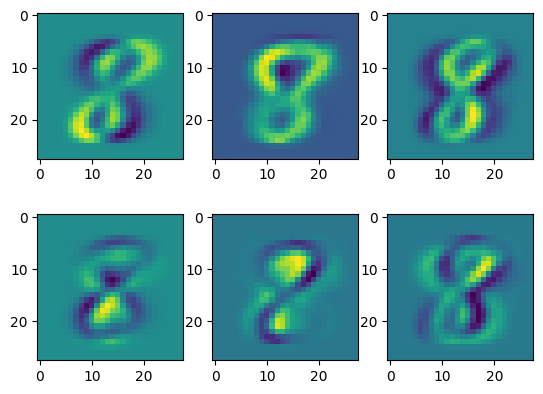

In [17]:
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=3)
for i in range(3):
    comp = pca.components_[i].reshape((lado, lado))
    ax0[i].imshow(comp)
for i in range(3):
    comp = pca.components_[i + 3].reshape((lado, lado))
    ax1[i].imshow(comp)